In [7]:
from IPython.display import set_matplotlib_formats, display
import pandas as pd
import numpy as np
!pip install mglearn
import matplotlib.pyplot as plt
import mglearn
from cycler import cycler
%matplotlib inline

You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


k-meansクラスタリング
---
- 最も単純で最も広く用いられているクラスタリングアルゴリズム
- データのある領域を代表するような「クラスタ重心」を見つけようとする
- アルゴリズムは次の2つのステップを繰り返す
    - 個々のデータポイントを最寄りのクラスタ重心に割り当てる
    - 個々のクラスタ重心をその点に割り当てられたデータポイントの平均に設定する

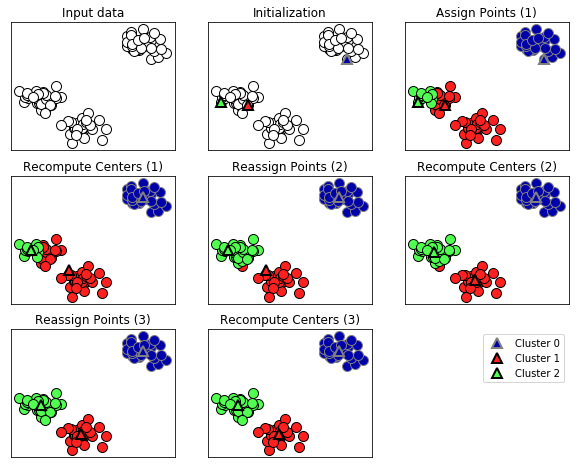

In [8]:
mglearn.plots.plot_kmeans_algorithm()

- データポイントを○クラスタセンタを△で示している
- クラスタセンタの再計算と点の割当を繰り返しクラスタリングしている
- 3度目の再計算でクラスタセンタが動かなくなるためこのアルゴリズムは停止する

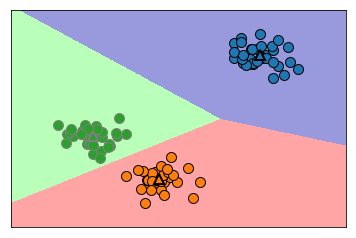

In [9]:
mglearn.plots.plot_kmeans_boundaries()

- k-meansで発見されたクラスタセンタとクラスタ境界

In [10]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 合成2次元データを作る
X, y = make_blobs(random_state=1)

# クラスタリングモデルを作る(n_clustersはクラスタの数)
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


- アルゴリズムの実行過程で個々の訓練データポイントに対して割り当てられたクラスタラベルは「kmeans.labels_」で確認できる

In [13]:
print(kmeans.predict(X))

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


- predictメソッドをもとに新しいデータポイントにクラスタを割り当てることができる
    - 既存のモデルが変更されることはない

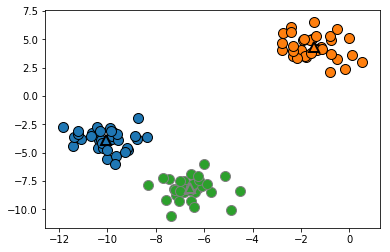

In [20]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:, 0], 
                         kmeans.cluster_centers_[:, 1], [0, 1, 2], markers='^', markeredgewidth=2)

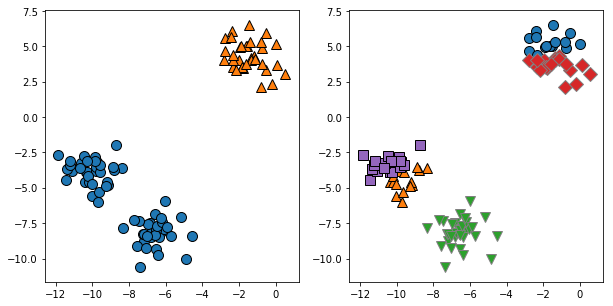

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# クラスタセンタを2つに指定
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[0])

# クラスタセンタを5つに指定
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)
assignments = kmeans.labels_

mglearn.discrete_scatter(X[:, 0], X[:, 1], assignments, ax=axes[1])
 

- k-meansで見つけるクラスタ割当の数を2と5に変えてみる

### k-meansがうまくいかない場合
- k-meansは比較的単純な形しか見つけられない
- またk-meansではクラスタ境界をクラスタセンタのちょうど中間にひく

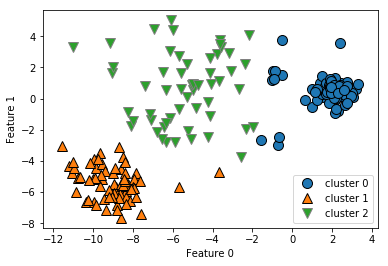

In [24]:
X_varied, y_varied = make_blobs(n_samples=200,
                                  cluster_std=[1.0, 2.5, 0.5],
                                  random_state=170)
y_pred = KMeans(n_clusters=3, random_state=0).fit_predict(X_varied)
mglearn.discrete_scatter(X_varied[:, 0], X_varied[:, 1], y_pred)
plt.legend(["cluster 0", "cluster 1", "cluster 2"], loc='best')
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 普通に考えると左下と右上とそれ以外の中心の3クラスに分類できそう
- しかし、真ん中の方向の一部に他のデータポイントとはかけ離れた位置にあるデータポイントも含まれてしまっている
- これはクラスタセンタの中間に境界を引いているため

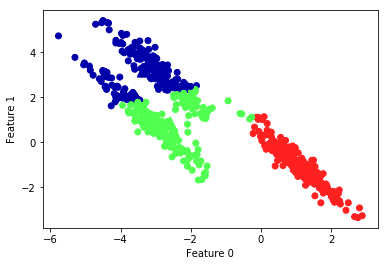

In [26]:
# ランダムにクラスタデータを作成
X, y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 対角線方向に引き伸ばす
transformation = rng.normal(size=(2, 2))
X = np.dot(X, transformation)

# データポイントを3つにクラスタリング
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm3)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='^', c=[0, 1, 2], s=100, linewidth=2, cmap=mglearn.cm3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 明らかに3つに分類できるデータポイントを持つ2次元データセットを対角線上に引き伸ばす
- しかしこのデータポイントはk-meansでは正しく分類ができない
- これは、k-meansは最も近いクラスセンタへの距離しか考慮していないため
- つまり、k-meansでは基本的には円でしかクラス分けを行うことができない

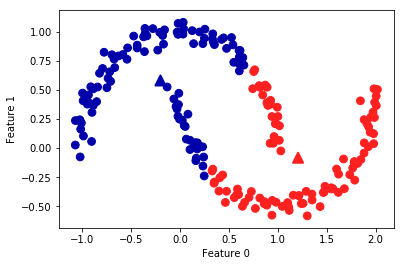

In [30]:
# 合成データセットtwo_moonsデータ作成(今度はノイズ少なめ)
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

# 2つのクラスタにクラスタ分類
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

# クラスタ割り当てとクラスタセンタをプロット
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=mglearn.cm2, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
              marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidth=2)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

- 上記のような複雑な形状に対してはうまく機能しない

### ベクトル量子化、もしくは成分分解としてのk-means
- k-meansとPCAやNMFなどの成分分解手法の間には興味深い類似性がある
    - PCAはデータ中にもっとも分散が大きい方向郡を見出そうとする
    - NMFは足しこんでいくことのできる成分を見つけようとしていた
- PCAやNMFなどの手法はデータポイントを風数の成分の和として表現しようとする
- これに対してk-meansはクラスタセンタで個々のデータポイントを表現する
    - 個々のデータポインタをクラスタセンタとして与えられる単一の成分で表現していると考えることができる
- このようにk-meansを単一成分で個々のデータポイントを表現する成分分析手法をしてみる考え方を「ベクトル量子化(vector quantization)」と呼ぶ

### k-meansの特徴
- k-meansは非常によく用いられるクラスタリングアルゴリズム
    - 比較的理解しやすく実装しやすい
    - 比較的高速に実行できる
    - 大規模なデータセットにも適用できる
        - scit-leanではさらに非常に大規模なデータセットを処理できるMIniBatchKMeansも用意されている
- k-meansの欠点の一つは初期化が乱数で行われること
    - これはアルゴリズムの出力が乱数のシードに依存することを意味する
    - scikit-leanではデフォルトで異なる乱数を用いて10回実行し最良の結果を返してくる
- さらにk-meansはクラスタの形に対してかなり成約の強い仮定を置いていることと、探しているクラスタの数をユーザが指定しなくてはならないこと
    - クラスタの数は実世界のアプリケーションではわからないことが多い
    

凝縮型クラスタリング(agglomeratice clustering)
---
- 凝縮型クラスタリングとは、ある原則に基づく一連のクラスタリングアルゴリズム
- 個々のデータポイントをそれぞれ個別のクラスタとして開始し、最も類似した2つのクラスタを併合していく
- これらをなにかの終了条件が満たされるまで繰り返す